In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
# Define, clean and partitionate the data
df_wdi = pd.read_csv(r"C:\Users\Usuario\Downloads\gdp_perc_growth_2004_2024.csv", sep=";", decimal=',')
df_wdi = df_wdi.dropna()
df_wdi.columns = [col.split(' [')[0] if ' [' in col else col for col in df_wdi.columns]
df_wdi

Country Code  2004  2005  2006  2007  2008  2009  2010  2011  2012  ...  \
0           USA  2.89  2.53  1.80  1.04 -0.82 -3.43  1.83  0.76  1.48  ...   
1           LUX  2.76  0.93  4.34  6.44 -2.06 -5.01  1.88 -1.18 -0.76  ...   
2           CHE  2.00  2.09  3.42  2.99  1.51 -3.51  2.17  0.69  0.11  ...   
3           CHL  5.60  4.79  5.02  4.14  2.75 -2.11  4.79  5.18  5.14  ...   
4           POL  5.15  3.31  6.27  6.82  4.37  2.55  3.46  5.20  1.51  ...   
5           ETH  1.02  8.55  7.63  8.24  7.63  5.76  9.40  8.06  5.64  ...   
6           VNM  6.50  6.55  5.57  5.25  3.75  3.83  5.21  0.52  4.28  ...   
7           IRL  0.49  3.46  0.22  2.31 -6.41 -6.05  0.11  1.21 -0.82  ...   
8           GBR  1.88  2.03  1.63  1.83 -1.03 -5.34  1.44  0.35  0.79  ...   
9           KOR  4.78  4.09  4.71  5.27  2.23  0.28  6.27  2.89  1.87  ...   
10          NGA  6.27  3.53  0.32  3.68  3.83  5.07  5.03  2.40  1.38  ...   
11          BGD  3.82  5.20  5.44  5.91  4.96  4.07  4.65  0.06  5.51  ...   
12          PAK  5.20  0.47  3.56  1.72 -0.58  0.88 -0.98  0.41  1.08  ...   
13          EGY  1.97  2.38  4.78  0.51  5.17  0.27  3.15 -0.35 -0.04  ...   
14          PHL  4.52  3.01  3.56  4.69  2.52 -0.36  5.16  1.84  0.48  ...   
15          MAR  3.21  1.78  6.31  2.03  4.25  2.34  2.08  4.07  1.66  ...   
16          IDN  0.37  0.43  4.11  4.95  4.65  3.31  4.89  4.82  4.68  ...   
17          IND  6.10  6.18  6.38  6.05  1.61  6.31  6.93  3.76  4.02  ...   
18          PER  3.93  5.34  6.68  7.73  0.84  0.47  0.76  5.54  5.26  ...   
19          MOZ  5.76  3.88  7.36  5.12  4.28  3.22  3.86  4.19  4.94  ...   
20          DEU  1.18  0.94  0.40  3.03  1.10 -5.31  4.31  5.70  0.29  ...   
21          ESP  1.35  1.82  2.30  1.63 -0.83 -4.62 -0.37 -0.99 -2.93  ...   
22          JPN  2.15  1.79  0.13  1.37 -1.27 -5.68  4.08  0.21  1.54  ...   
23          CAN  2.14  2.24  1.60  1.06 -0.09 -4.02  1.95  2.14  0.66  ...   
24          AUS  0.31  1.91  1.38  1.90  1.53 -0.19  0.64  0.99  2.12  ...   
25          NOR  3.40  1.99  1.64  1.85 -0.76 -3.17 -0.46 -0.20  1.38  ...   
26          NLD  1.66  1.80  3.37  0.37  1.72 -4.16  0.80  1.30 -1.34  ...   
27          DNK  2.51  2.08  3.48  0.54 -1.00 -5.48  1.13  0.89 -0.38  ...   
28          SWE  3.77  2.38  4.09  2.46 -1.69 -0.51  0.05  2.39 -1.15  ...   
29          FIN  3.70  2.43  3.62  4.87  0.32 -8.51  2.70  1.92 -1.99  ...   

    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  
0   2.13  1.02  1.75  2.36  2.06 -2.56  0.59  1.92  2.04  1.80  
1  -0.12  2.74 -1.12 -0.33  0.75 -2.15  5.32 -3.07 -2.68 -0.65  
2   0.49  0.96  0.42  2.11  0.42 -2.85  4.75  0.22 -0.57 -0.33  
3   1.11  0.53 -0.24  2.15 -0.96 -6.98  0.11  1.65 -0.02  2.09  
4   4.50  3.08  5.14  6.25  4.61 -0.86  8.47  0.57  0.62  3.30  
5   7.47  6.51  6.62  3.97  5.49  3.22  2.86  2.60  3.85  4.58  
6   5.67  5.35  5.62  6.28  6.32  1.92  1.67  0.77  4.36  0.64  
7   2.34 -0.07  8.57  5.99  3.39  5.81  1.46  6.49 -7.22 -0.15  
8   1.49  1.12  2.10  0.91  1.10 -1.04  8.19  3.88 -0.90  0.03  
9   2.27  0.25  2.87  2.46  0.19 -0.85  4.44  2.81  0.13  1.28  
10  0.08 -4.02 -1.62 -0.04 -0.01 -3.86  1.50  1.11  0.72  1.29  
11  5.60  6.16  5.69  6.44  6.97  2.59  6.07  6.01  0.45  2.96  
12  2.77  5.20  2.97  4.44  0.78 -3.04  4.52  2.96 -1.58  1.69  
13  2.20  2.24  2.12  3.35  3.72  1.88  1.76  5.02  2.02  0.64  
14  0.48  0.57  5.56  5.03  4.84 -1.05  4.76  6.77  4.67  4.82  
15  3.11 -0.69  3.78  1.91  1.82 -8.14  0.71  0.50  2.34  3.19  
16  3.71  3.91  4.00  4.16  0.40 -2.89  2.97  4.52  4.17  0.42  
17  6.72  6.97  0.06  5.29  2.80 -6.69  8.79  6.76  8.23  5.54  
18  2.09  2.58  1.02  0.21  0.50 -0.12  1.23  1.83 -1.49  2.18  
19  4.32  1.67 -0.38  0.45 -0.65 -4.11 -0.61  1.33  2.37 -1.08  
20  0.78  1.47  2.33  0.81  0.76 -4.17  3.63  0.64 -0.39  0.23  
21  4.15  2.84  2.65  1.93  1.23 -1.14  6.49  5.42  1.48  2.18  
22  1.67  0.81  1.76  0.77 -0.26 -3.89  3.17  1.39  1.97  0.52  
23 -0.11 -0.10  0.18  1.

In [9]:
# Data partitioning in groups
df_wdi['Pre_Crisis_Growth (2004-2008)'] = df_wdi.loc[:, '2004':'2008'].mean(axis=1, skipna=True)
df_wdi['Recuperation_Growth (2009-2013)'] = df_wdi.loc[:, '2009':'2013'].mean(axis=1, skipna=True)
df_wdi['Stability_Growth (2014-2018)'] = df_wdi.loc[:, '2014':'2018'].mean(axis=1, skipna=True)
df_wdi['Recent_Growth (2019-2024)'] = df_wdi.loc[:, '2019':'2024'].mean(axis=1, skipna=True)

results = df_wdi[['Country Code', 'Pre_Crisis_Growth (2004-2008)', 'Recuperation_Growth (2009-2013)', 
                  'Stability_Growth (2014-2018)', 'Recent_Growth (2019-2024)']]
                  
emerging = ['CHL', 'POL', 'ETH', 'VNM', 'IND', 'EGY', 'IDN', 'PER', 'MAR', 'PHL', 'NGA', 'BGD', 'PAK', 'MOZ']
developed = ['USA', 'CHE', 'LUX', 'GBR', 'KOR', 'IRL', 'DEU', 'ESP', 'JPN', 'CAN', 'AUS', 'NOR', 'NLD', 'DNK', 'SWE', 'FIN']

df_wdi['Group'] = df_wdi['Country Code'].apply(lambda x: 'Emerging' if x in emerging else 'Developed' if x in developed else 'Other')

results.round(2)

Country Code  Pre_Crisis_Growth (2004-2008)  \
0           USA                           1.49   
1           LUX                           2.48   
2           CHE                           2.40   
3           CHL                           4.46   
4           POL                           5.18   
5           ETH                           6.61   
6           VNM                           5.52   
7           IRL                           0.01   
8           GBR                           1.27   
9           KOR                           4.22   
10          NGA                           3.53   
11          BGD                           5.07   
12          PAK                           2.07   
13          EGY                           2.96   
14          PHL                           3.66   
15          MAR                           3.52   
16          IDN                           2.90   
17          IND                           5.26   
18          PER                           4.90   
19          MOZ                           5.28   
20          DEU                           1.33   
21          ESP                           1.25   
22          JPN                           0.83   
23          CAN                           1.39   
24          AUS                           1.41   
25          NOR                           1.62   
26          NLD                           1.78   
27          DNK                           1.52   
28          SWE                           2.20   
29          FIN                           2.99   

    Recuperation_Growth (2009-2013)  Stability_Growth (2014-2018)  \
0                              0.40                          1.79   
1                             -0.85                          0.28   
2                              0.02                          1.02   
3                              3.07                          0.87   
4                              2.69                          4.59   
5                              7.30                          6.38   
6                              3.63                          5.61   
7                             -0.78                          5.07   
8                             -0.33                          1.61   
9                              2.80                          2.08   
10                             3.54                         -0.41   
11                             3.86                          5.80   
12                             0.81                          3.59   
13                             0.58                          2.10   
14                             2.38                          3.25   
15                             2.09                          1.91   
16                             4.39                          3.91   
17                             5.20                          5.02   
18                             3.39                          1.45   
19                             3.95                          2.14   
20                             1.02                          1.43   
21                            -2.00                          2.68   
22                             0.46                          1.09   
23                             0.17                          0.62   
24                             0.88                          0.99   
25                            -0.53                          0.77   
26                            -0.74                          1.73   
27                            -0.57                          1.64   
28                             0.21                          1.37   
29                            -1.46                          1.13   

    Recent_Growth (2019-2024)  
0                        0.98  
1                       -0.41  
2                        0.27  
3                       -0.68  
4                        2.78  
5                        3.77  
6                        2.61  
7                        1.63  
8                       

In [13]:
# Function with group, beta-coeficient and r2
def plot_beta_convergence(data, x_col, y_col, x_label, y_label, title, groups=['Emerging', 'Developed']):
    plt.figure(figsize=(10, 6))
    colors = {'Emerging': 'blue', 'Developed': 'orange'}
    for group in groups:
        subset = data[data['Group'] == group].dropna(subset=[x_col, y_col])
        X = subset[[x_col]]
        y = subset[y_col]
        model = LinearRegression().fit(X, y)
        r2 = r2_score(y, model.predict(X))
        plt.scatter(X, y, label=f'{group} data', color=colors[group], alpha=0.5)
        plt.plot(X, model.predict(X), linestyle='-', color=colors[group], 
                 label=f'{group} (β = {model.coef_[0]:.2f}, R² = {r2:.2f})')
    
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

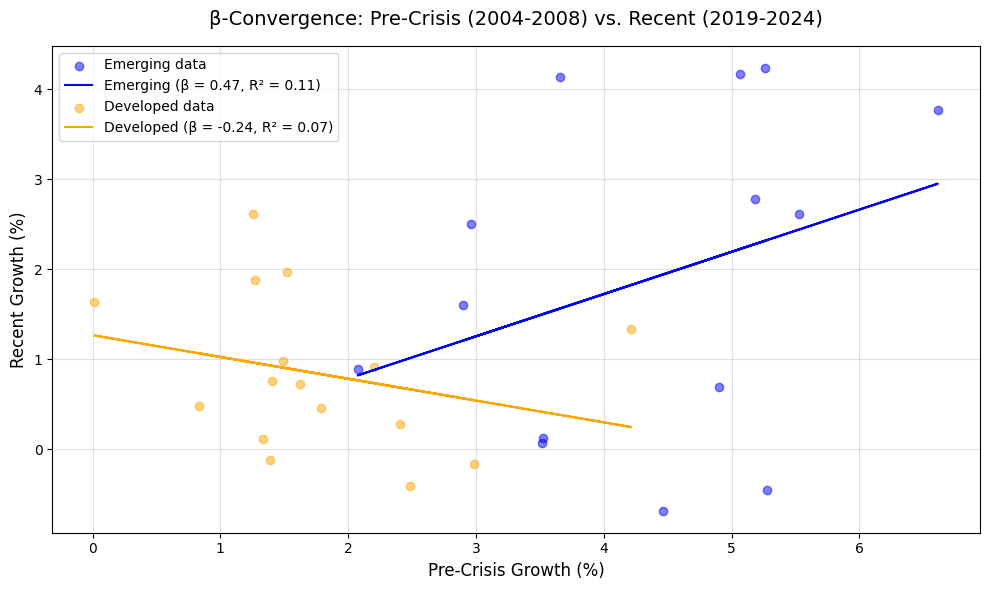

In [14]:
# First plot
plot_beta_convergence(
    df_wdi, 
    'Pre_Crisis_Growth (2004-2008)', 'Recent_Growth (2019-2024)',
    'Pre-Crisis Growth (%)', 'Recent Growth (%)',
    'β-Convergence: Pre-Crisis (2004-2008) vs. Recent (2019-2024)'
)

In [15]:
# Second plot
plot_beta_convergence(
    df_wdi, 
    'Recuperation_Growth (2009-2013)', 'Stability_Growth (2014-2018)',
    'Recuperation Growth (%)', 'Stability Growth (%)',
    'β-Convergence: Post-Crisis (2009-2013) vs. Stability (2014-2018)'
)

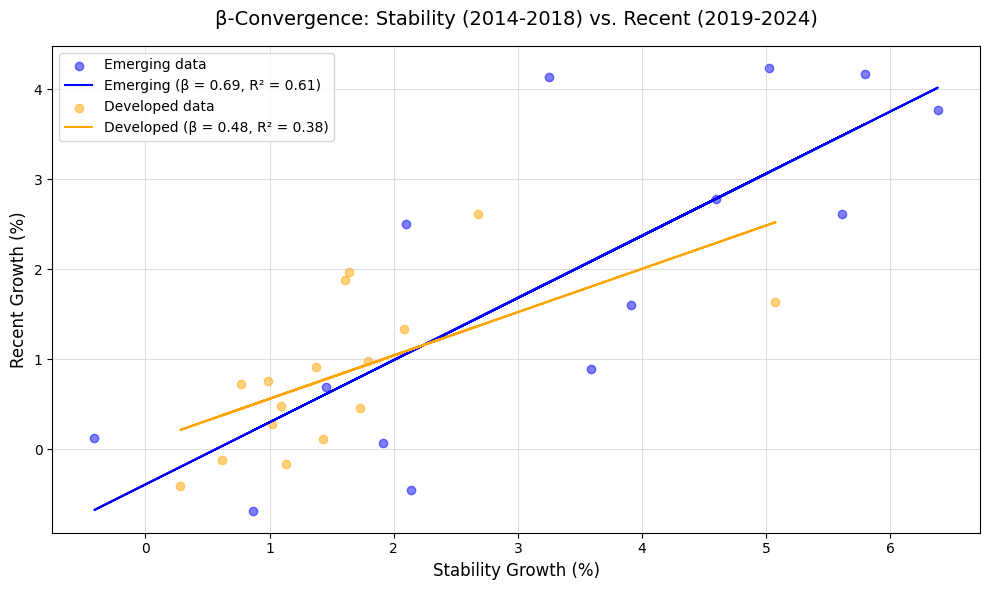

In [16]:
# Third plot
plot_beta_convergence(
    df_wdi, 
    'Stability_Growth (2014-2018)', 'Recent_Growth (2019-2024)',
    'Stability Growth (%)', 'Recent Growth (%)',
    'β-Convergence: Stability (2014-2018) vs. Recent (2019-2024)'
)